In [176]:
#import the nitty gritty
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [177]:
# read the csv file and store into a variable
data = pd.read_csv("data.csv",error_bad_lines=False)
# we can see that line 52431 and 131201 are bad lines, we're skipping them

b'Skipping line 52431: expected 8 fields, saw 9\n'
b'Skipping line 131201: expected 8 fields, saw 9\n'


In [178]:
# lets see the current description of the data
data.describe(include='all')

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
count,149997,149997.000000,149997.000000,149997,136329,149996,149997,149997
unique,19,NaN,NaN,7,1048,51,10947,2
top,Current,NaN,NaN,A,10+ years,MORTGAGE,60000,36 months
freq,142877,NaN,NaN,44777,45067,73416,5908,102850
mean,NaN,16020.131903,12.908371,NaN,NaN,NaN,NaN,NaN
std,NaN,10138.276997,5.127491,NaN,NaN,NaN,NaN,NaN
min,NaN,1000.000000,6.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,8000.000000,8.460000,NaN,NaN,NaN,NaN,NaN
50%,NaN,14000.000000,11.800000,NaN,NaN,NaN,NaN,NaN
75%,NaN,22000.000000,16.140000,NaN,NaN,NaN,NaN,NaN


In [179]:
# lets see how many columns - row does it have
data.shape

(149997, 8)

In [180]:
# OK, so nothing seems worong atm, lets check for empty value
data.isnull()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
149992,False,False,False,False,False,False,False,False
149993,False,False,False,False,True,False,False,False
149994,False,False,False,False,False,False,False,False
149995,False,False,False,False,False,False,False,False


In [181]:
# we can see that there are a rows that contain null data, lets count how many
data.isnull().sum()

loan_status           0
loan_amnt             0
int_rate              0
grade                 0
emp_length        13668
home_ownership        1
annual_inc            0
term                  0
dtype: int64

In [182]:
# Since emp_length and home_ownership are categorical data, we can replace each empty row with it's mode
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)
data['home_ownership'].fillna(data['home_ownership'].mode()[0],inplace=True)

In [183]:
# Lets look at the data
data.isnull().sum()
# No more empty rows, awesome!

loan_status       0
loan_amnt         0
int_rate          0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
term              0
dtype: int64

In [184]:
# Now, we got no missing data, lets try seeing the data as a whole
data.describe()

,loan_amnt,int_rate
count,149997.000000,149997.000000
mean,16020.131903,12.908371
std,10138.276997,5.127491
min,1000.000000,6.000000
25%,8000.000000,8.460000
50%,14000.000000,11.800000
75%,22000.000000,16.140000
max,40000.000000,30.990000


In [185]:
# notice that there are several columns that can be replaced with integers only e.g. emp_length and term, lets do that
def parse_term(row):
    try:
        return row.split(" ")[1]
    except:
        print("term => ",row)


def parse_emp_length(row):
    try:
        row_length = len(row.split(" "))
        if(row_length == 2):
            return row.split(" ")[0]
        elif row_length == 3:
            return "".join(row.split(" ")[0:2:1])
    except:
        print("emp_length =>",row)
    

data['emp_length'] = data.apply(lambda row: parse_emp_length(row.emp_length), axis=1)
data['term'] = data.apply(lambda row: parse_term(row.term), axis=1)
# lets see the result
data.head(10)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,2500,13.56,C,10+,RENT,55000,36
1,Current,30000,18.94,D,10+,MORTGAGE,90000,60
2,Current,5000,17.97,D,6,MORTGAGE,59280,36
3,Current,4000,18.94,D,10+,MORTGAGE,92000,36
4,Current,30000,16.14,C,10+,MORTGAGE,57250,60
5,Current,5550,15.02,C,10+,MORTGAGE,152500,36
6,Current,2000,17.97,D,4,RENT,51000,36
7,Current,6000,13.56,C,10+,RENT,65000,36
8,Current,5000,17.97,D,10+,MORTGAGE,53580,36
9,Current,6000,14.47,C,<1,OWN,300000,36


In [186]:
# we have solved the term column, now lets take a look at emp_length
print(dict(data['emp_length'].value_counts()))
# we can see that there are irrelevant data if the count is less than 400, so we are dropping them
data = data[data.groupby('emp_length').emp_length.transform('count')>400]
data['emp_length'].value_counts()

{'10+': 58735, '<1': 18326, '2': 12574, '3': 11701, '1': 10395, '5': 8984, '4': 8719, '6': 6288, '7': 5065, '8': 4742, '9': 3226, '': 332, 'Business': 30, 'Human': 13, 'Client': 12, 'Product': 11, 'IT': 9, 'Customer': 9, 'Talent': 9, 'Information': 8, 'Digital': 7, 'Program': 6, 'Data': 6, 'North': 5, 'Professional': 5, 'Technical': 5, 'Global': 5, 'Public': 5, 'Technology': 5, 'Consumer': 4, 'Marketing': 4, 'Project': 4, 'Field': 4, 'Employee': 4, 'Financial': 4, 'Sales': 4, 'National': 4, 'Clinical': 4, 'Compliance': 4, 'Brand': 4, 'Regulatory': 3, 'Legal': 3, 'Network': 3, 'Commercial': 3, 'Branch': 3, 'Patient': 3, 'Media': 3, 'Application': 3, 'Retail': 3, 'Operations': 3, 'Process': 3, 'Internal': 2, 'Quality': 2, 'Organizational': 2, 'Sustainability': 2, 'Corporate': 2, 'Clinic': 2, 'Shared': 2, 'Franchise': 2, 'Senior': 2, 'Visitor': 2, 'assistant': 2, 'Instructional': 2, 'Security': 2, 'Specialty': 2, 'Registered': 2, 'Campus': 2, 'medical': 2, 'Creative': 2, 'Team': 2, 'Cloud

10+    58735
<1     18326
2      12574
3      11701
1      10395
5       8984
4       8719
6       6288
7       5065
8       4742
9       3226
Name: emp_length, dtype: int64

In [187]:
data['emp_length'].value_counts()

10+    58735
<1     18326
2      12574
3      11701
1      10395
5       8984
4       8719
6       6288
7       5065
8       4742
9       3226
Name: emp_length, dtype: int64

In [188]:
# # lets take a look at the processed data data, notice the column "emp_length", still has a lot of unstandardized data like "10+" and "<1"
# # lets clean them up

# 1. make a function that accepts a row, and return a cleaned - more standardized data
# here we categorize the data into <5, 5, and >5, way more easier to read!
def clean_emp_length(row):
    if row == "10+":
        return ">5"
    elif row == "<1":
        return "<5"
    elif int(row) == 5:
        return "5"
    elif int(row) < 5:
        return "<5"
    elif int(row) > 5:
        return ">5"

# # 2. Lets apply the function to the data
data['emp_length'] = data.apply(lambda row: clean_emp_length(row.emp_length), axis=1)
# # lets see the result
data['emp_length'].value_counts()

>5    78056
<5    61715
5      8984
Name: emp_length, dtype: int64

In [189]:
# So now lets take  a look at our data
data.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,2500,13.56,C,>5,RENT,55000,36
1,Current,30000,18.94,D,>5,MORTGAGE,90000,60
2,Current,5000,17.97,D,>5,MORTGAGE,59280,36
3,Current,4000,18.94,D,>5,MORTGAGE,92000,36
4,Current,30000,16.14,C,>5,MORTGAGE,57250,60


In [190]:
# set the columns to numeric, and remove the outliers
# outliers are rows that z-value exceeds or below 3*standard deviation
TO_NUMERIC = ['loan_amnt','int_rate','annual_inc','term']
for col in TO_NUMERIC:
    data[col] = pd.to_numeric(data[col])
    data = data[np.abs(data[col]-data[col].mean()) <= (3*data[col].std())]

In [191]:
data = data.dropna()
data.describe()

,loan_amnt,int_rate,annual_inc,term
count,147459.000000,147459.000000,147459.000000,147459.000000
mean,15935.654996,12.835979,78871.832891,43.484874
std,10089.348008,5.002075,48962.151784,11.118205
min,1000.000000,6.000000,0.000000,36.000000
25%,8000.000000,8.460000,47000.000000,36.000000
50%,14000.000000,11.800000,68000.000000,36.000000
75%,21000.000000,16.140000,97000.000000,60.000000
max,40000.000000,27.270000,407816.000000,60.000000


In [192]:
data.describe(include='all')
# data['term'].count_values

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
count,147459,147459.000000,147459.000000,147459,147459,147459,147459.000000,147459.000000
unique,10,NaN,NaN,5,3,6,NaN,NaN
top,Current,NaN,NaN,A,>5,MORTGAGE,NaN,NaN
freq,141714,NaN,NaN,44104,77333,72712,NaN,NaN
mean,NaN,15935.654996,12.835979,NaN,NaN,NaN,78871.832891,43.484874
std,NaN,10089.348008,5.002075,NaN,NaN,NaN,48962.151784,11.118205
min,NaN,1000.000000,6.000000,NaN,NaN,NaN,0.000000,36.000000
25%,NaN,8000.000000,8.460000,NaN,NaN,NaN,47000.000000,36.000000
50%,NaN,14000.000000,11.800000,NaN,NaN,NaN,68000.000000,36.000000
75%,NaN,21000.000000,16.140000,NaN,NaN,NaN,97000.000000,60.000000


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'term'}>]], dtype=object)

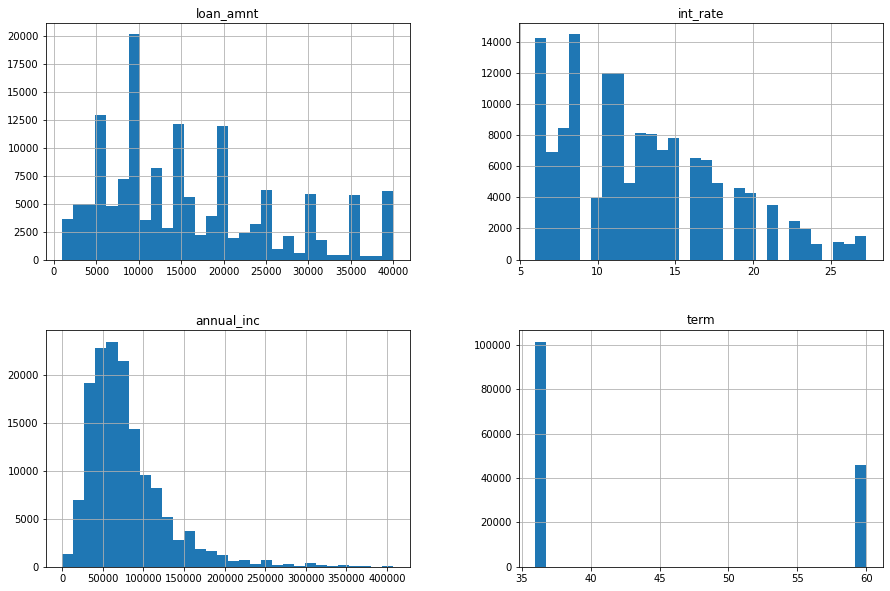

In [193]:
data.hist(bins=30, figsize=(15, 10))

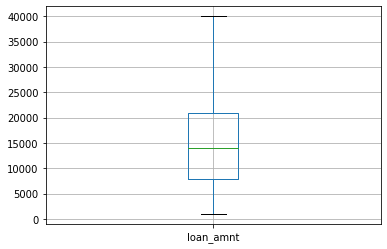

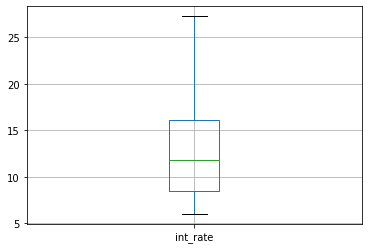

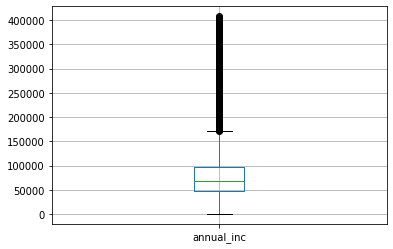

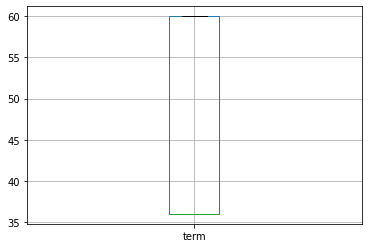

In [194]:
# see the boxplot
for column in TO_NUMERIC:
    plt.figure()
    data.boxplot([column])

In [195]:
# saving
data.to_csv('cleaned_data.csv',index=None, header=True)